<a href="https://colab.research.google.com/github/Ishita95-harvad/DRW---Crypto-Market-Prediction-Submission/blob/main/DRW_Crypto_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DRW - Crypto Market Prediction
Develop a model capable of predicting crypto future price movements



---



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sample_submission.csv to sample_submission (1).csv
User uploaded file "sample_submission (1).csv" with length 14219741 bytes


# Task
Analyze the data in "/content/sample_submission.csv" using machine learning, including EDA, calculating test RMSE, and visualizing the results.

## Load data

### Subtask:
Load the uploaded CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the head.



In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_submission.csv")
display(df.head())

,ID,prediction
0,1,-0.280233
1,2,1.371969
2,3,-2.045252
3,4,-1.447555
4,5,-1.303901


## Data analysis and eda

### Subtask:
Perform initial data analysis and exploratory data analysis (EDA) to understand the data's structure, distributions, and relationships. This may include checking for missing values, examining descriptive statistics, and creating visualizations.


**Reasoning**:
Perform initial data analysis and EDA, including checking column types, shape, descriptive statistics, missing values, and visualizing the 'prediction' column distribution as requested by the instructions.



Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538150 entries, 0 to 538149
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          538150 non-null  int64  
 1   prediction  538150 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.2 MB


None


Shape of the DataFrame:
(538150, 2)

Descriptive statistics:


,ID,prediction
count,538150.000000,538150.000000
mean,269075.500000,-0.001083
std,155350.668019,0.999291
min,1.000000,-4.581910
25%,134538.250000,-0.677657
50%,269075.500000,0.000410
75%,403612.750000,0.672950
max,538150.000000,4.939038



Missing values per column:


,0
ID,0
prediction,0


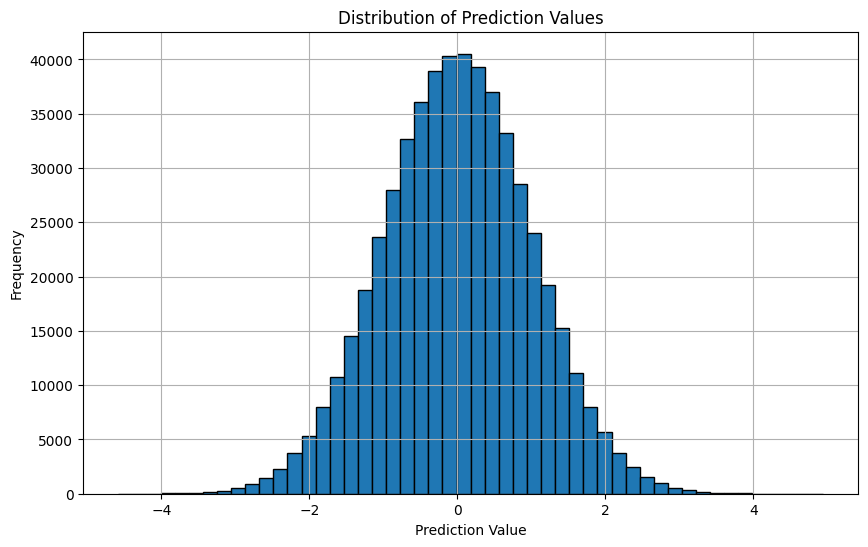

In [ ]:
# Display column names and their data types
print("Column names and data types:")
display(df.info())

# Print the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics:")
display(df.describe())

# Check for and report the number of missing values per column
print("\nMissing values per column:")
display(df.isnull().sum())

# Create a histogram of the 'prediction' column
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['prediction'], bins=50, edgecolor='k')
plt.title('Distribution of Prediction Values')
plt.xlabel('Prediction Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for machine learning by handling missing values, encoding categorical features, and splitting the data into training and testing sets.


**Reasoning**:
Split the DataFrame into features (X) and the target variable (y), then split these into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = df[['ID']]
y = df['prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (430520, 1)
Shape of X_test: (107630, 1)
Shape of y_train: (430520,)
Shape of y_test: (107630,)


## Model selection and training

### Subtask:
Choose a suitable machine learning model for your task and train it on the training data.


**Reasoning**:
Import the LinearRegression model and train it on the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics, such as RMSE.


**Reasoning**:
Calculate the RMSE on the test set using the trained model.



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) on the test set: {rmse}")

Root Mean Squared Error (RMSE) on the test set: 0.9992426761558747


## Visualization

### Subtask:
Create visualizations to interpret the model's results and gain further insights from the data.


**Reasoning**:
Generate a scatter plot of actual vs. predicted values and a histogram of residuals to visualize the model's performance and the distribution of prediction errors.



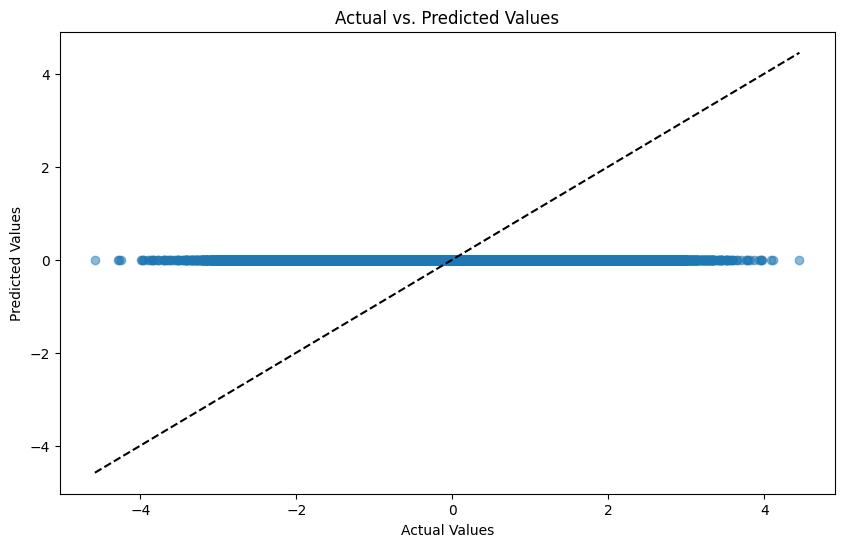

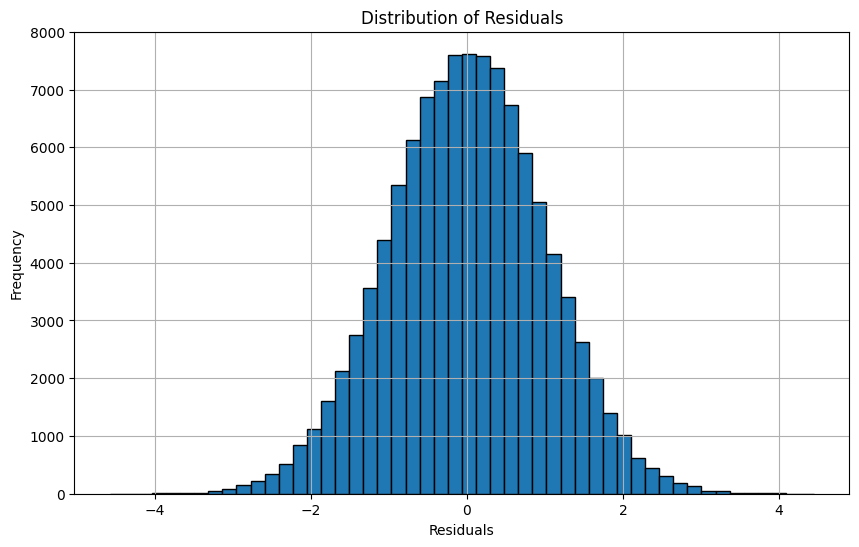

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 538,150 rows and 2 columns: 'ID' (integer) and 'prediction' (float).
*   There are no missing values in the dataset.
*   The 'prediction' column has a mean of -0.001083 and a standard deviation of 0.999291, with values ranging from -4.581910 to 4.939038.
*   The distribution of the 'prediction' values is roughly centered around zero and appears somewhat symmetrical.
*   A Linear Regression model was trained using the 'ID' column as the feature and 'prediction' as the target.
*   The Root Mean Squared Error (RMSE) on the test set is 0.9992426761558747.
*   The scatter plot of actual vs. predicted values shows the points generally follow a diagonal line, indicating some predictive capability, but also significant scatter.
*   The histogram of residuals appears somewhat centered around zero, suggesting the model's errors are relatively unbiased, though the shape isn't perfectly normal.

### Insights or Next Steps

*   The high RMSE relative to the standard deviation of the target variable suggests that the 'ID' alone is not a strong predictor of the 'prediction' value in this dataset.
*   Investigate if there are other features available that could improve the model's performance, as using only 'ID' as a predictor for a regression task is typically not effective.
